In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulugbekshernazarov","key":"be76ac87c751706e7327ae48b71e2163"}'}

In [ ]:
ls

kaggle.json


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

100% 1.82G/1.83G [00:54<00:00, 29.4MB/s]
100% 1.83G/1.83G [00:54<00:00, 35.8MB/s]


In [ ]:
!mkdir Data

In [ ]:
! unzip stanford-car-dataset-by-classes-folder.zip -d Data

Streaming output truncated to the last 5000 lines.
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/04381.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/06441.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/06447.jpg  
  inflating: cars/car_data/car_data/train/Chrysler Aspen SUV 2009/06590.jpg  
  inflating: 

In [ ]:
!pip install colorthief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from colorthief import ColorThief
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input, BatchNormalization, Lambda, AveragePooling2D, ZeroPadding2D, Reshape, Activation
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
car_train = "Data/car_data/car_data/train/"
print('There are', len(os.listdir(car_train)),'folders in the training dataset')

There are 196 folders in the training dataset


In [ ]:
mylist = []
for labels in os.listdir(car_train):
    for label in os.listdir(car_train+labels): 
        car_add = car_train + labels + '/' + label
        car_value = (labels, car_add)                
        if car_value not in mylist:
            mylist.append(car_value)
            
train_df = pd.DataFrame(np.array(mylist), columns= ["car", "image path"])

In [ ]:
# Create train_df
train_df.sample(10)

,car,image path
2888,Chevrolet Corvette Ron Fellows Edition Z06 2007,cars/car_data/car_data/train/Chevrolet Corvett...
7314,Hyundai Veloster Hatchback 2012,cars/car_data/car_data/train/Hyundai Veloster ...
5279,Jaguar XK XKR 2012,cars/car_data/car_data/train/Jaguar XK XKR 201...
1621,Lamborghini Diablo Coupe 2001,cars/car_data/car_data/train/Lamborghini Diabl...
7982,Cadillac Escalade EXT Crew Cab 2007,cars/car_data/car_data/train/Cadillac Escalade...
2060,Isuzu Ascender SUV 2008,cars/car_data/car_data/train/Isuzu Ascender SU...
4325,Ford Fiesta Sedan 2012,cars/car_data/car_data/train/Ford Fiesta Sedan...
4691,Chrysler Sebring Convertible 2010,cars/car_data/car_data/train/Chrysler Sebring ...
3116,FIAT 500 Abarth 2012,cars/car_data/car_data/train/FIAT 500 Abarth 2...
4897,Chevrolet Silverado 1500 Regular Cab 2012,cars/car_data/car_data/train/Chevrolet Silvera...


In [ ]:
car_test= "Data/car_data/car_data/test/"
print('There are', len(os.listdir(car_test)),'folders in the test dataset')

There are 196 folders in the test dataset


In [ ]:
# Create test_df
list2 = []
for labels in os.listdir(car_test):
    for label in os.listdir(car_test+labels): 
        car_add = car_test + labels + '/' + label
        car_value = (labels, car_add)                
        if car_value not in mylist:
            list2.append(car_value)   

test_df = pd.DataFrame(np.array(list2), columns= ["car", "image path"])

In [ ]:
test_df.sample(10)

,car,image path
2506,Acura TL Sedan 2012,cars/car_data/car_data/test/Acura TL Sedan 201...
3379,Eagle Talon Hatchback 1998,cars/car_data/car_data/test/Eagle Talon Hatchb...
4049,Hyundai Tucson SUV 2012,cars/car_data/car_data/test/Hyundai Tucson SUV...
3604,Hyundai Genesis Sedan 2012,cars/car_data/car_data/test/Hyundai Genesis Se...
6901,BMW 3 Series Sedan 2012,cars/car_data/car_data/test/BMW 3 Series Sedan...
7012,Porsche Panamera Sedan 2012,cars/car_data/car_data/test/Porsche Panamera S...
4509,Dodge Challenger SRT8 2011,cars/car_data/car_data/test/Dodge Challenger S...
7318,Chevrolet TrailBlazer SS 2009,cars/car_data/car_data/test/Chevrolet TrailBla...
3652,Nissan Juke Hatchback 2012,cars/car_data/car_data/test/Nissan Juke Hatchb...
5010,Chrysler PT Cruiser Convertible 2008,cars/car_data/car_data/test/Chrysler PT Cruise...


In [ ]:
clr_headers = ['color', 'full_name', 'hex', 'r', 'g', 'b'] # list for header
colors = pd.read_csv('colors.csv', names=clr_headers, index_col = 'color') # Load in csv
colors['rgb'] = list(zip(colors['r'], colors['g'], colors['b'])) # combine r/g/b as rgb tuple
colors_df = colors.drop(columns=['full_name', 'hex', 'r', 'g', 'b']) # drop old columns and save to new df
colors_dict = dict(zip(colors_df.index, colors_df['rgb'])) # create dictionary with color(key):rgb(value)

def classify_color(filepath):
    # Color thief will find the most dominant rgb color in an image
    color_thief = ColorThief(filepath)
    dominant_color = color_thief.get_color(quality=1)

    # Manhattan distance between "classification points"
    manhattan = lambda x,y : abs(x[0] - y[0]) + abs(x[1] - y[1]) + abs(x[2] - y[2]) 
    
    # Find the best color in dictionary and find Manhattan distance
    distances = {k: manhattan(v, dominant_color) for k, v in colors_dict.items()}
    
    # Minimum distance to color point
    color = min(distances, key=distances.get) 
    return color

In [ ]:
# Take 3 hours.
train_df['color'] = train_df['image path'].apply(classify_color)

In [ ]:
train_df.to_csv('train_df_color.csv')

In [ ]:
train_df = pd.read_csv('train_df_color.csv')
train_df = train_df[['car', 'image path', 'color', 'car label']]

In [ ]:
train_df['car_label'] = train_df.color.astype("category").cat.codes
train_df['car_label'] = train_df['car_label'].astype("str")

In [ ]:
train_df.groupby(train_df['car_label']).count().sort_values(by='color', ascending=False).head(10)

,car,image path,color,car label
car_label,,,,
104,608,608,608,608
75,433,433,433,433
20,426,426,426,426
19,347,347,347,347
58,343,343,343,343
8,339,339,339,339
133,330,330,330,330
134,314,314,314,314
183,284,284,284,284


In [ ]:
train_img_df = train_df[['image path', 'car_label']].copy()
train_img_df.sample(5)

,image path,car_label
898,Data/car_data/car_data/train/Audi TT Hatchback...,133
4034,Data/car_data/car_data/train/Eagle Talon Hatch...,58
2587,Data/car_data/car_data/train/Chevrolet Malibu ...,14
587,Data/car_data/car_data/train/Audi R8 Coupe 201...,195
591,Data/car_data/car_data/train/Audi R8 Coupe 201...,116


In [ ]:
train_img_df.shape

(8144, 2)

In [ ]:
# Take almost 3 hours.
test_df['color'] = test_df['image path'].apply(classify_color)

In [ ]:
# Lets save to csv so later we can follow this file if smth happens
test_df.to_csv('test_df_color')

In [ ]:
test_df = pd.read_csv("test_df_color.csv")

In [ ]:
test_df['car_label'] = test_df.color.astype("category").cat.codes
test_df['car_label'] = test_df['car_label'].astype("str")

In [ ]:
test_df.head()

,Unnamed: 0,car,image path,color,car_label
0,0,Acura Integra Type R 2001,Data/car_data/car_data/test/Acura Integra Type...,grullo,106
1,1,Acura Integra Type R 2001,Data/car_data/car_data/test/Acura Integra Type...,jet,111
2,2,Acura Integra Type R 2001,Data/car_data/car_data/test/Acura Integra Type...,light_gray,121
3,3,Acura Integra Type R 2001,Data/car_data/car_data/test/Acura Integra Type...,lavender_gray,117
4,4,Acura Integra Type R 2001,Data/car_data/car_data/test/Acura Integra Type...,arsenic,6


In [ ]:
test_df.groupby(test_df['car_label']).count().sort_values(by='color', ascending=False)

,Unnamed: 0,car,image path,color
car_label,,,,
111,591,591,591,591
82,465,465,465,465
21,438,438,438,438
20,376,376,376,376
66,349,349,349,349
...,...,...,...,...
153,1,1,1,1
155,1,1,1,1
29,1,1,1,1


In [ ]:
test_img_df = test_df[['image path', 'car_label']].copy()
test_img_df.sample(5)

,image path,car_label
2841,Data/car_data/car_data/test/Chevrolet Silverad...,20
2242,Data/car_data/car_data/test/Chevrolet Cobalt S...,205
6075,Data/car_data/car_data/test/Jeep Wrangler SUV ...,172
3220,Data/car_data/car_data/test/Chrysler Sebring C...,17
4521,Data/car_data/car_data/test/Ford Fiesta Sedan ...,142


In [ ]:
test_img_df.shape

(8041, 2)

In [ ]:
# ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1./255,       
                             shear_range=0.2,
                             zoom_range=0.3,
                             horizontal_flip=True,
                             brightness_range=[0.5,1.5],
                             validation_split=0.25)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe = train_img_df,
    directory = None,
    x_col="image path",
    y_col="car_label",
    has_ext=True,                                     
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224), 
    color_mode='rgb'
)

Found 6108 validated image filenames belonging to 200 classes.


In [ ]:
valid_generator = datagen.flow_from_dataframe(
    dataframe=train_img_df,
    directory = None, 
    x_col="image path",
    y_col="car_label",
    has_ext=True,
    subset="validation",
    batch_size=2,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224), 
    color_mode='rgb'
)

Found 2036 validated image filenames belonging to 200 classes.


In [ ]:
# ImageDataGenerator for testing
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_img_df,

    directory = None,
    x_col="image path",
    y_col=None, # None for testing
#     has_ext=True,
    batch_size=32,
    seed=42,
    shuffle=False, # yield images in order
    class_mode=None, # return only the images
    target_size=(224,224),
    color_mode ='rgb'
)

Found 8041 validated image filenames.


In [ ]:
# Defining epoch step sizes based on number of images divided by batch size
step_train = train_generator.n//train_generator.batch_size
step_valid = valid_generator.n//valid_generator.batch_size
step_test = test_generator.n//test_generator.batch_size

In [ ]:
def color_net(num_classes):
    # placeholder for input image
    input_image = Input(shape=(224,224,3))
    # ============================================= TOP BRANCH ===================================================
    # first top convolution layer
    top_conv1 = Conv2D(filters=48,kernel_size=(11,11),strides=(4,4),
                              input_shape=(224,224,3),activation='relu')(input_image)
    top_conv1 = BatchNormalization()(top_conv1)
    top_conv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_conv1)

    # second top convolution layer
    # split feature map by half
    top_top_conv2 = Lambda(lambda x : x[:,:,:,:24])(top_conv1)
    top_bot_conv2 = Lambda(lambda x : x[:,:,:,24:])(top_conv1)

    top_top_conv2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_top_conv2)
    top_top_conv2 = BatchNormalization()(top_top_conv2)
    top_top_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_top_conv2)

    top_bot_conv2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_bot_conv2)
    top_bot_conv2 = BatchNormalization()(top_bot_conv2)
    top_bot_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_bot_conv2)

    # third top convolution layer
    # concat 2 feature map
    top_conv3 = Concatenate()([top_top_conv2,top_bot_conv2])
    top_conv3 = Conv2D(filters=192,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_conv3)

    # fourth top convolution layer
    # split feature map by half
    top_top_conv4 = Lambda(lambda x : x[:,:,:,:96])(top_conv3)
    top_bot_conv4 = Lambda(lambda x : x[:,:,:,96:])(top_conv3)

    top_top_conv4 = Conv2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_top_conv4)
    top_bot_conv4 = Conv2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_bot_conv4)

    # fifth top convolution layer
    top_top_conv5 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_top_conv4)
    top_top_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_top_conv5) 

    top_bot_conv5 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_bot_conv4)
    top_bot_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_bot_conv5)

    # ============================================= TOP BOTTOM ===================================================
    # first bottom convolution layer
    bottom_conv1 = Conv2D(filters=48,kernel_size=(11,11),strides=(4,4),
                              input_shape=(227,227,3),activation='relu')(input_image)
    bottom_conv1 = BatchNormalization()(bottom_conv1)
    bottom_conv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_conv1)

    # second bottom convolution layer
    # split feature map by half
    bottom_top_conv2 = Lambda(lambda x : x[:,:,:,:24])(bottom_conv1)
    bottom_bot_conv2 = Lambda(lambda x : x[:,:,:,24:])(bottom_conv1)

    bottom_top_conv2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_top_conv2)
    bottom_top_conv2 = BatchNormalization()(bottom_top_conv2)
    bottom_top_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_top_conv2)

    bottom_bot_conv2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_bot_conv2)
    bottom_bot_conv2 = BatchNormalization()(bottom_bot_conv2)
    bottom_bot_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_bot_conv2)

    # third bottom convolution layer
    # concat 2 feature map
    bottom_conv3 = Concatenate()([bottom_top_conv2,bottom_bot_conv2])
    bottom_conv3 = Conv2D(filters=192,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_conv3)

    # fourth bottom convolution layer
    # split feature map by half
    bottom_top_conv4 = Lambda(lambda x : x[:,:,:,:96])(bottom_conv3)
    bottom_bot_conv4 = Lambda(lambda x : x[:,:,:,96:])(bottom_conv3)

    bottom_top_conv4 = Conv2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_top_conv4)
    bottom_bot_conv4 = Conv2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_bot_conv4)

    # fifth bottom convolution layer
    bottom_top_conv5 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_top_conv4)
    bottom_top_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_top_conv5) 

    bottom_bot_conv5 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_bot_conv4)
    bottom_bot_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_bot_conv5)

    # ======================================== CONCATENATE TOP AND BOTTOM BRANCH =================================
    conv_output = Concatenate()([top_top_conv5,top_bot_conv5,bottom_top_conv5,bottom_bot_conv5])

    # Flatten
    flatten = Flatten()(conv_output)

    # Fully-connected layer
    FC_1 = Dense(units=4096, activation='relu')(flatten)
    FC_1 = Dropout(0.6)(FC_1)
    FC_2 = Dense(units=4096, activation='relu')(FC_1)
    FC_2 = Dropout(0.6)(FC_2)
    output = Dense(units=num_classes, activation='softmax')(FC_2)
    
    model = Model(inputs=input_image,outputs=output)
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    # sgd = SGD(lr=0.01, momentum=0.9, decay=0.0005, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
num_classes = 200
nb_epoch = 15

# initialise model
model = color_net(num_classes)

filepath = 'color_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,steps_per_epoch=step_train,epochs=nb_epoch,validation_data=valid_generator,validation_steps=step_valid,callbacks=callbacks_list,verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
190/190 [==============================] - ETA: 0s - loss: 4.3490 - accuracy: 0.0568
Epoch 1: val_accuracy improved from -inf to 0.08988, saving model to color_weights.hdf5
190/190 [==============================] - 450s 2s/step - loss: 4.3490 - accuracy: 0.0568 - val_loss: 4.5507 - val_accuracy: 0.0899
Epoch 2/15
190/190 [==============================] - ETA: 0s - loss: 4.0704 - accuracy: 0.0718
Epoch 2: val_accuracy improved from 0.08988 to 0.09823, saving model to color_weights.hdf5
190/190 [==============================] - 449s 2s/step - loss: 4.0704 - accuracy: 0.0718 - val_loss: 3.9885 - val_accuracy: 0.0982
Epoch 3/15
190/190 [==============================] - ETA: 0s - loss: 3.9564 - accuracy: 0.0856
Epoch 3: val_accuracy improved from 0.09823 to 0.11886, saving model to color_weights.hdf5
190/190 [==============================] - 455s 2s/step - loss: 3.9564 - accuracy: 0.0856 - val_loss: 3.8970 - val_accuracy: 0.1189
Epoch 4/15
190/190 [==========================

In [ ]:
# Evaluate model
model.evaluate(
    valid_generator, 
    steps=step_valid, 
    verbose=1)

1018/1018 [==============================] - 71s 70ms/step - loss: 3.3362 - accuracy: 0.1424


[3.3361921310424805, 0.14243614673614502]

In [ ]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 54, 54, 48)   17472       ['input_1[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 54, 54, 48)   17472       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 54, 54, 48)  192         ['conv2d[0][0]']             

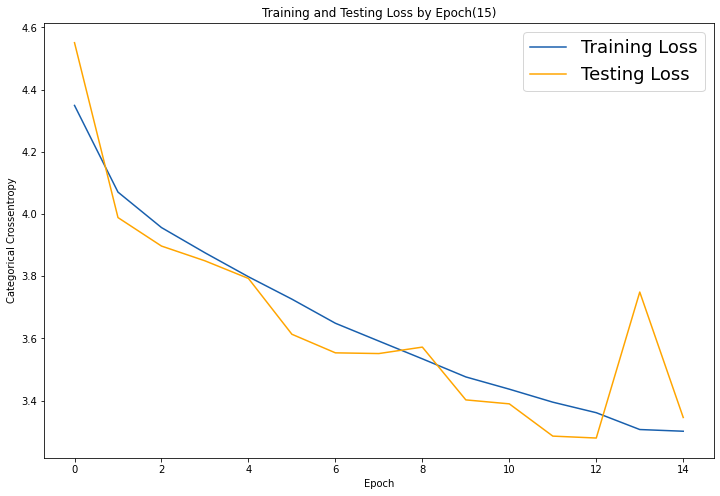

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch(15)')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
# plt.xticks()

plt.legend(fontsize = 18);

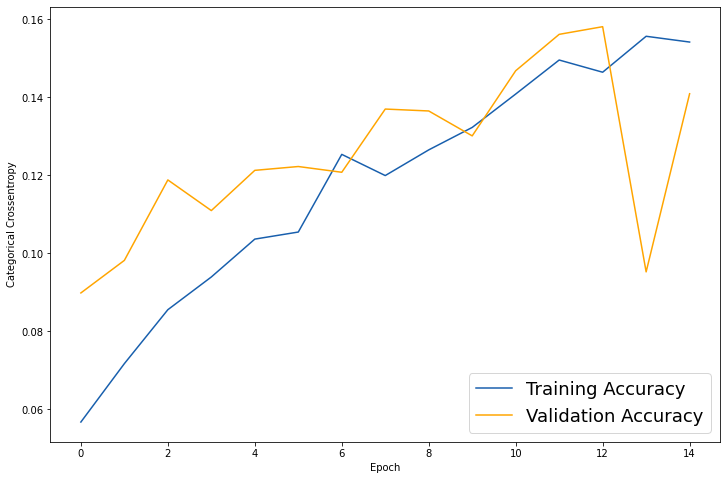

In [ ]:
# Check out our train loss and test loss over epochs.
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Validation Accuracy', color='orange')

# Set title
# plt.title('Training and Validation Accuracy by Epoch (15)', fontsize = 25)
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
# plt.xticks(range(15))

plt.legend(fontsize = 18, loc="lower right");

In [ ]:
# Predict
test_generator.reset()
pred=model.predict(test_generator,verbose=1)

252/252 [==============================] - 146s 574ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

[173  90   7 ...  94  94 178]


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [ ]:
results

,Filename,Predictions
0,Data/car_data/car_data/test/Acura Integra Type...,75
1,Data/car_data/car_data/test/Acura Integra Type...,18
2,Data/car_data/car_data/test/Acura Integra Type...,104
3,Data/car_data/car_data/test/Acura Integra Type...,183
4,Data/car_data/car_data/test/Acura Integra Type...,20
...,...,...
8036,Data/car_data/car_data/test/Volvo XC90 SUV 200...,104
8037,Data/car_data/car_data/test/Volvo XC90 SUV 200...,104
8038,Data/car_data/car_data/test/Volvo XC90 SUV 200...,183
8039,Data/car_data/car_data/test/Volvo XC90 SUV 200...,183
